### Rendering

### Interactively

In [ ]:
from zxopt.translation.CircuitTranslator import CircuitTranslator
from zxopt.visualization import Window

window = Window()
window.main_loop()


### OpenQASM

In [4]:
from zxopt.openqasm import OpenQasmParser

parser = OpenQasmParser()
circuit = parser.load_file("./circuits/bell_swap.qasm")

### ZX-diagram


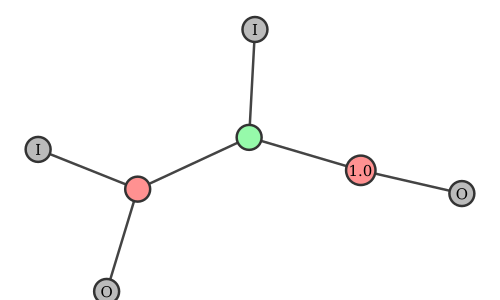

In [1]:
from zxopt.data_structures.diagram import Diagram
from zxopt.visualization import DiagramRenderer
import math

diagram = Diagram()
in1 = diagram.add_boundary("in")
in2 = diagram.add_boundary("in")
out1 = diagram.add_boundary("out")
out2 = diagram.add_boundary("out")

s1_1 = diagram.add_spider(0.0, "green")
s1_2 = diagram.add_spider(0.0, "red")
s2_1 = diagram.add_spider(math.pi, "red")

diagram.add_wire(in1, s1_1)
diagram.add_wire(in2, s1_2)
diagram.add_wire(s1_1, s1_2)
diagram.add_wire(s1_1, s2_1)
diagram.add_wire(s2_1, out1)
diagram.add_wire(s1_2, out2)

# diagram.render()
diagram_renderer = DiagramRenderer(diagram)
diagram_renderer.render_image()

In [5]:
circuit = OpenQasmParser().load_file("./circuits/test/simple_translation_test.qasm")
diagram = CircuitTranslator(circuit).translate()

renderer = DiagramRenderer(diagram)
# renderer = CircuitRenderer(circuit)

window = Window(renderer)
window.main_loop()

line 63:0 missing ';' at 'cx'


NameError: name 'CircuitTranslator' is not defined